# Simulação de sistemas no dominio do tempo

Como varia $v_o(t)$ em relaçã a $v_1(t)$?

Vamos estudar Espaço de Estados:

$$\dot{x}(t)=Ax(t)+Bu(t)$$
$$y(t)=Cx(t)+Du(t)$$

- Matrizes: A,B,C,D
- $u(t)$: entrada
- $y(t)$: saída
- $x(t)$: vetor do espaço de estados
- $\dot{x}(t)$: derivada do vetor de estados

## Atividade da Aula
Obter o modelo no espaço de estados, considerando R=1, L=2 e C=3.

$$\begin{bmatrix}
\frac{-1}{RC} & \frac{1}{C} \\
\frac{1}{L} & 0\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
\frac{1}{RC}\\
0\\
\end{bmatrix}
$$

## Sistema
$$Y(s) = C(sI-A)^{-1}x(0)+[C(sI-A)^{-1}B+D]U(s)$$
$$x(0)=0 \to G(s) = frac{Y(s)}{U(s)} = C(sI-A)^{-1}B+D$$

In [14]:
import control
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy as sp

- Exercicio
Mostra que a resposta ao degrau unitário do circuito rlc em tela é:


In [3]:
t = np.linspace(0, 25, 1000)

rd = np.array([
        1.0954*np.exp(-0.1667*t)*np.cos(0.3727*t+0.4205),
        -0.8944*np.exp(-0.1667*t)*np.cos(0.3727*t-np.pi/2)
        ])
rd2 = (0.8944*np.exp(-0.1667*t)*np.cos(0.3727*t-np.pi/2)).reshape(-1, 1)
x0 = np.array([10,-3]).reshape(2,1)

In [4]:
rd.shape, x0.shape, rd2.shape

((2, 1000), (2, 1), (1000, 1))

In [5]:
resposta_degrau = (rd.T.dot(x0)+rd2)

In [6]:
A = np.array([[-1/3, -1/3],[1/2, 0]])
B = np.array([[1/3, 0]]).T
C = np.array([[1, 0]])
D = np.array([[0]])
ss = control.StateSpace(A, B, C, D)

In [7]:
sr = control.step_response(ss, X0=x0, T=np.linspace(0, 25, 1000))

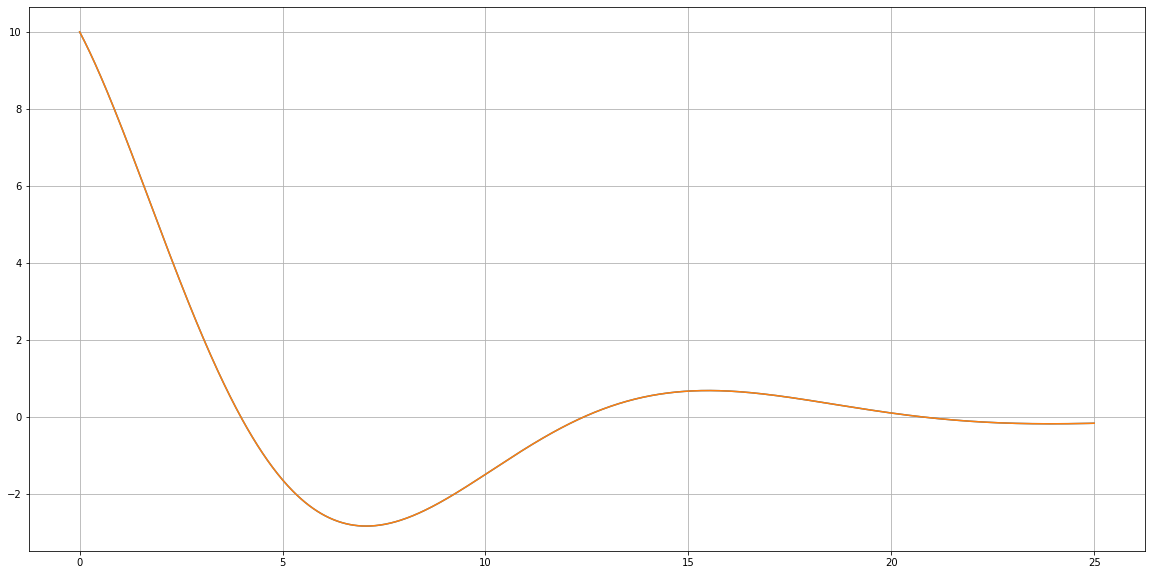

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(x=sr.t.flatten(), y=sr.y.flatten())
sns.lineplot(x=t, y=resposta_degrau.flatten())
plt.grid()
plt.show()
plt.close()

## Discretizada
$$x[k+1] = A_dx[k]+B_du[k]$$
$$y[k] = C_dx[k]+D_du[k]$$
$$A_d = e^{AT_s}$$
$$B_d = A^{-1}(A_d-I)B$$
$$C_d = C$$
$$D_d = D$$


In [82]:
def discretizado(A, B, C, D, x0, Ts, tk, uk):
    Ad = sp.linalg.expm(A*Ts)
    Bd = np.linalg.inv(A).dot(Ad-np.eye(2)).dot(B)
    Cd = C
    Dd = D
    yk = 0
    xk = x0
    yk0 = []
    for u in uk:
        yk = Cd.dot(xk)+Dd.dot(u)
        xk = Ad.dot(xk)+Bd.dot(u)
        yk0.append(yk.flatten())
    yk0 = np.array(yk0).flatten()
    return tk, yk0

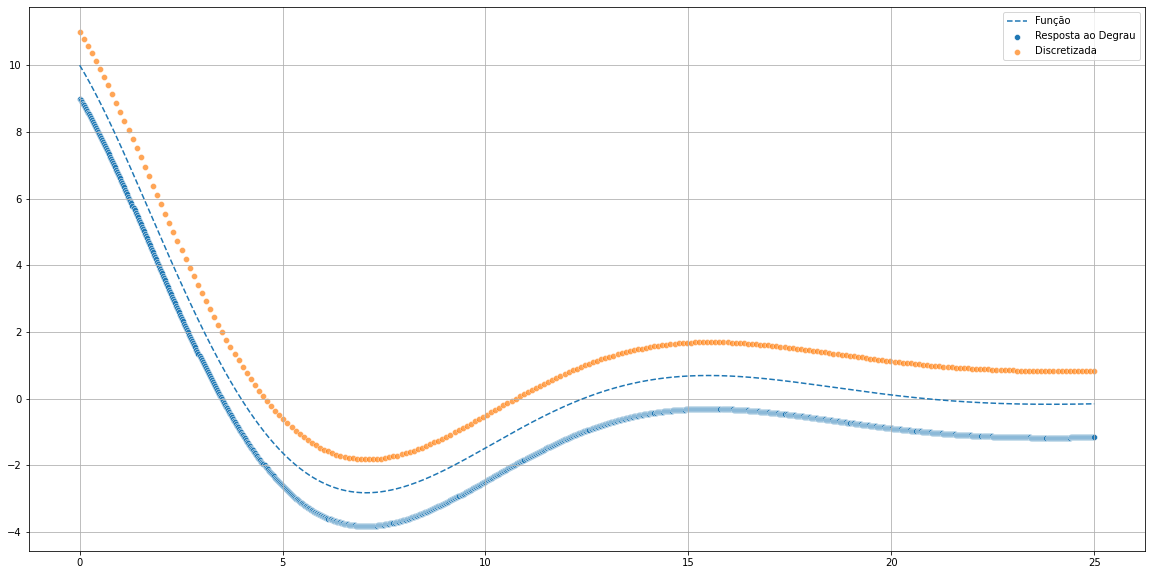

In [88]:
amostras = 250
Ts = 0.1
tk = np.linspace(0, amostras*Ts, amostras)
tk, yk = discretizado(A, B, C, D, x0, Ts, tk, [1]*amostras)
plt.figure(figsize=(20,10))
sns.lineplot(x=sr.t.flatten(), y=sr.y.flatten(), label='Função', linestyle='--')
sns.scatterplot(x=t, y=resposta_degrau.flatten()-1, label='Resposta ao Degrau')
sns.scatterplot(x=tk,y=yk+1, label='Discretizada', alpha=0.7)
plt.grid()
plt.show()
plt.close()

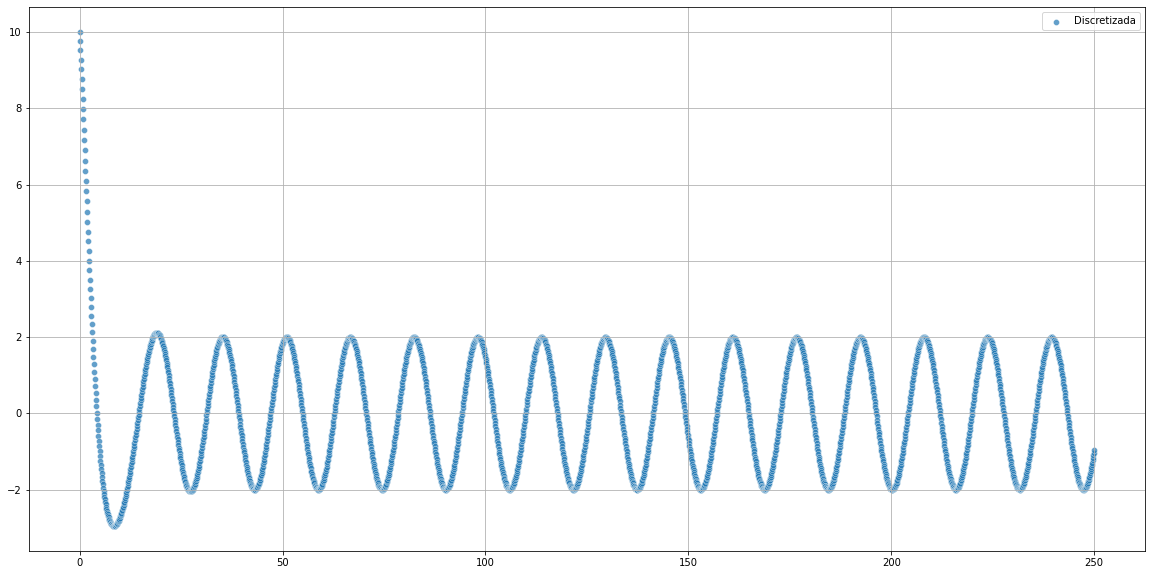

In [91]:
amostras = 2500
Ts = 0.1
tk = np.linspace(0, amostras*Ts, amostras)
utk = 2*np.sin(0.4*tk)
tk, yk = discretizado(A, B, C, D, x0, Ts, tk, utk)
plt.figure(figsize=(20,10))
sns.scatterplot(x=tk,y=yk, label='Discretizada', alpha=0.7)
plt.grid()
plt.show()
plt.close()